<style>
h1 {
  color: #0078d4
}
</style>
<h1>Clustering algorithms</h1>

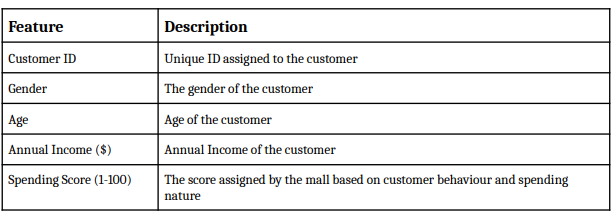

Questions:
1. Load the dataset and perform exploratory data analysis (EDA).
2. Preprocess the data by calculating the number of rows and columns, number of
missing values, outliers, distribution means, medians, quantiles, scaling,
transformation, visualisation, etc.
3. Apply four different clustering algorithms of your choice (e.g., K-means, Hierarchical,
DBSCAN, BIRCH, etc.).
4. Evaluate the performance of each clustering algorithm using relevant metrics (e.g.,
silhouette score, etc.)
5. Discuss the strengths and weaknesses of each clustering algorithm in the context of the
given dataset
6. Discuss your findings and propose potential applications or further steps based on
your results

In [218]:
import pandas as pd
#Importing the dataset
df = pd.read_csv("mall_customers_dataset.csv", sep=';', header=1)

<style>
h3 {
 color: #0078d4
}
</style>
<h3>Exploratory data analysis (EDA)</h3>

In [219]:
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100)
0,1,Male,19,15000,39
1,2,Male,21,15000,81
2,3,Female,20,16000,6
3,4,Female,23,16000,77
4,5,Female,31,17000,40


In [220]:
#printing info about columns
#it shows column names, number of rows, data types and number of null values per column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income ($)       200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [221]:
#describe gives insight about data frame as  min and max, middle, and quartile values per column...
print(df.describe(include='all'))

        CustomerID  Gender         Age  Annual Income ($)  \
count   200.000000     200  200.000000         200.000000   
unique         NaN       2         NaN                NaN   
top            NaN  Female         NaN                NaN   
freq           NaN     112         NaN                NaN   
mean    100.500000     NaN   38.850000       60560.000000   
std      57.879185     NaN   13.969007       26264.721165   
min       1.000000     NaN   18.000000       15000.000000   
25%      50.750000     NaN   28.750000       41500.000000   
50%     100.500000     NaN   36.000000       61500.000000   
75%     150.250000     NaN   49.000000       78000.000000   
max     200.000000     NaN   70.000000      137000.000000   

        Spending Score (1-100)  
count               200.000000  
unique                     NaN  
top                        NaN  
freq                       NaN  
mean                 50.200000  
std                  25.823522  
min                   1.000000  
25%

In [222]:
colors = ["#19647E", "#FF6F61"]

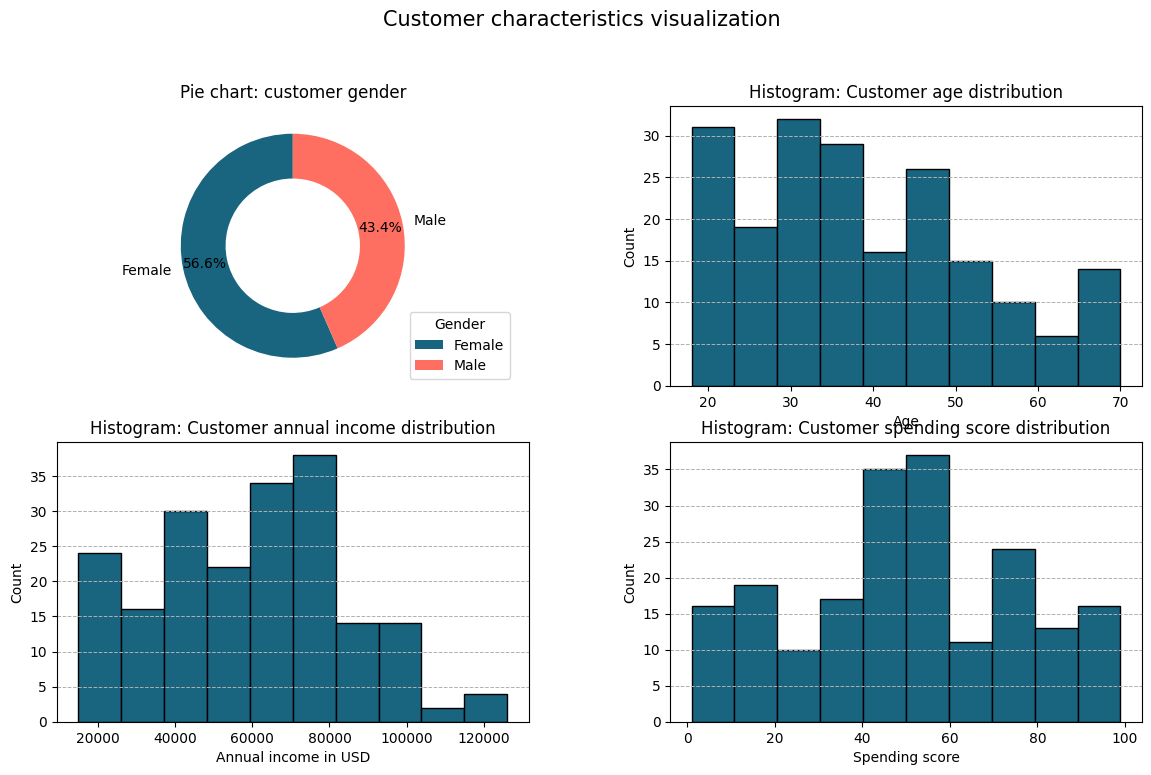

In [233]:
from matplotlib import pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(14, 8))
axs = axs.flatten()

gender_counts = df['Gender'].value_counts()
labels = gender_counts.index

axs[0].pie(df['Gender'].value_counts(), colors=colors, labels= labels ,autopct='%1.1f%%', startangle=90,  wedgeprops=dict(width=0.4), pctdistance=0.8)
axs[0].set_title("Pie chart: customer gender")
axs[0].legend(title="Gender", loc='lower right', bbox_to_anchor=(1.3, 0))

axs[1].hist(df['Age'], bins=10, color=colors[0], edgecolor='black')
axs[1].set_title("Histogram: Customer age distribution")
axs[1].set_xlabel("Age")
axs[1].set_ylabel("Count")
axs[1].grid(True, which='both', axis='y', linestyle='--', linewidth=0.7) 


axs[2].hist(df['Annual Income ($)'], bins=10, color=colors[0], edgecolor='black')
axs[2].set_title("Histogram: Customer annual income distribution")
axs[2].set_xlabel("Annual income in USD")
axs[2].set_ylabel("Count")
axs[2].grid(True, which='both', axis='y', linestyle='--', linewidth=0.7)

axs[3].hist(df['Spending Score (1-100)'], bins=10, color=colors[0], edgecolor='black')
axs[3].set_title("Histogram: Customer spending score distribution")
axs[3].set_xlabel("Spending score")
axs[3].set_ylabel("Count")
axs[3].grid(True, which='both', axis='y', linestyle='--', linewidth=0.7)

plt.suptitle("Customer characteristics visualization", fontsize=15, y=1.0)
plt.subplots_adjust(hspace=0.2, wspace=0.3)
plt.show()

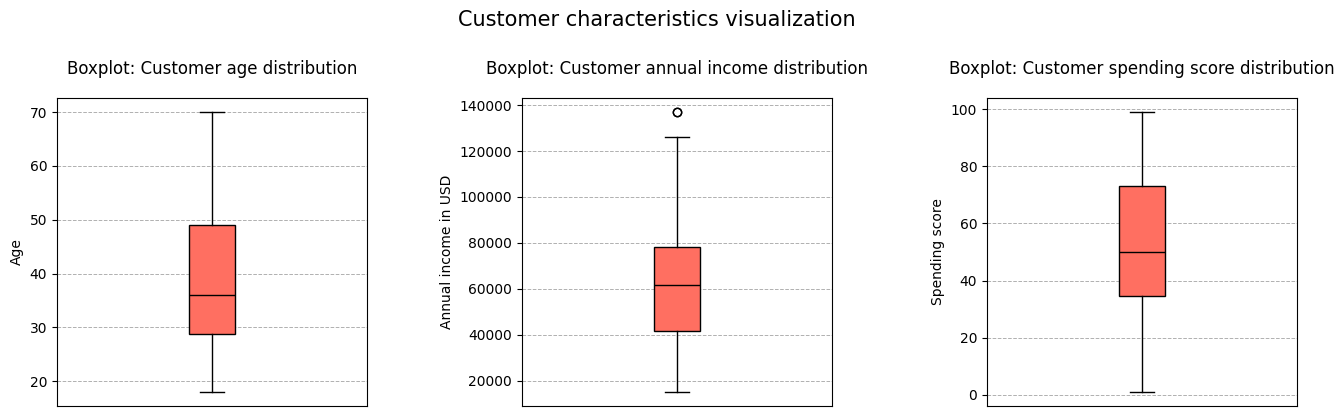

In [224]:
fig, axs = plt.subplots(1, 3, figsize=(16, 4))
axs = axs.flatten()

box_0 = axs[0].boxplot(df['Age'], medianprops=dict(color='black'), patch_artist=True)
axs[0].set_title("Boxplot: Customer age distribution", y=1.05)
axs[0].set_ylabel("Age")
axs[0].set_xticks([])   
axs[0].grid(True, which='both', axis='y', linestyle='--', linewidth=0.7)
for patch in box_0['boxes']:
    patch.set_facecolor(colors[1])  

box_1 = axs[1].boxplot(df['Annual Income ($)'], medianprops=dict(color='black'), patch_artist=True)
axs[1].set_title("Boxplot: Customer annual income distribution", y=1.05)
axs[1].set_ylabel("Annual income in USD")
axs[1].set_xticks([])
axs[1].grid(True, which='both', axis='y', linestyle='--', linewidth=0.7)
for patch in box_1['boxes']:
    patch.set_facecolor(colors[1])  

box_2 = axs[2].boxplot(df['Spending Score (1-100)'], medianprops=dict(color='black'), patch_artist=True)
axs[2].set_title("Boxplot: Customer spending score distribution", y=1.05)
axs[2].set_ylabel("Spending score")
axs[2].set_xticks([])
axs[2].grid(True, which='both', axis='y', linestyle='--', linewidth=0.7)
for patch in box_2['boxes']:
    patch.set_facecolor(colors[1])  

plt.suptitle("Customer characteristics visualization", fontsize=15, y=1.1)
plt.subplots_adjust(hspace=0.7, wspace=0.5)
plt.show()



In [225]:
df.drop(df[df['Annual Income ($)'] > 136000].index, inplace=True)

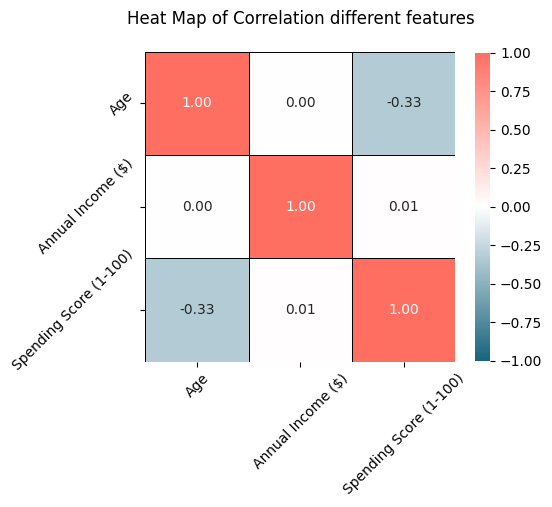

In [226]:
import numpy as np
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

numeric_df = df.select_dtypes(include=[np.number]) #to get only numerical columns
numeric_df.drop(['CustomerID'], axis=1, inplace=True) #drop the ID column
correlation_matrix = numeric_df.corr() #calculate the correlation matrix

my_colors = ['#19647E', '#FFFFFF', '#FF6F61']  # colors for the heatmap
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", my_colors) # create a custom color map

#plotting the heatmap
plt.figure(figsize=(5, 5))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap=custom_cmap, square=True, 
            cbar_kws={"shrink": .8}, linewidths=0.5, linecolor='black', vmin=-1, vmax=1)

plt.title('Heat Map of Correlation different features', pad=20)
plt.xticks(ticks=np.arange(len(numeric_df.columns)) + 0.5, labels=numeric_df.columns.str.replace("_", " "), rotation=45) #set the x-ticks
plt.yticks(ticks=np.arange(len(numeric_df.columns)) + 0.5, labels=numeric_df.columns.str.replace("_", " "), rotation=45) #set the y-ticks

plt.show()

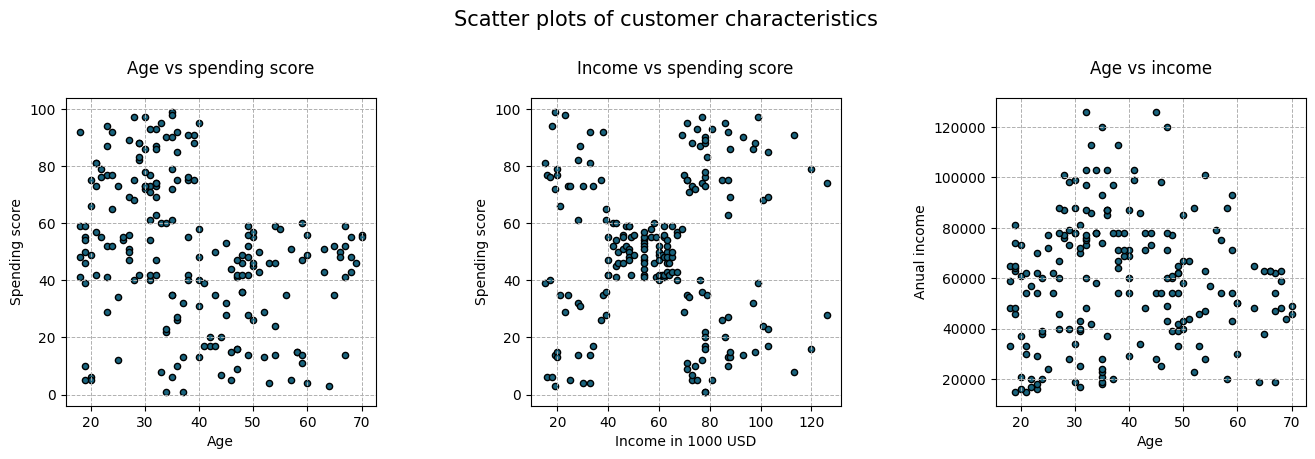

In [227]:
fig, axs = plt.subplots(1, 3, figsize=(16, 4))
axs = axs.flatten()

axs[0].scatter(df['Age'], df['Spending Score (1-100)'], color=colors[0], edgecolor='black', s=20)
axs[0].set_title("Age vs spending score", y=1.05)
axs[0].set_xlabel("Age")
axs[0].set_ylabel("Spending score")
axs[0].grid(True, which='both', axis='both', linestyle='--', linewidth=0.7)

axs[1].scatter(df['Annual Income ($)']/1000, df['Spending Score (1-100)'], color=colors[0], edgecolor='black', s=20)
axs[1].set_title("Income vs spending score", y=1.05)
axs[1].set_xlabel("Income in 1000 USD")
axs[1].set_ylabel("Spending score")
axs[1].grid(True, which='both', axis='both', linestyle='--', linewidth=0.7)

axs[2].scatter(df['Age'], df['Annual Income ($)'], color=colors[0], edgecolor='black', s=20)
axs[2].set_title("Age vs income", y=1.05)
axs[2].set_xlabel("Age")
axs[2].set_ylabel("Anual income")
axs[2].grid(True, which='both', axis='both', linestyle='--', linewidth=0.7)


plt.suptitle("Scatter plots of customer characteristics", fontsize=15, y=1.1)
plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()


In [228]:
from sklearn.preprocessing import StandardScaler

df_scaled = pd.DataFrame(df.drop('CustomerID', axis=1))

df_scaled.rename(columns={'Gender': 'Female'}, inplace=True)
pd.set_option('future.no_silent_downcasting', True) #to awoid worning when turning gender into numbers
df_scaled['Female'] = df_scaled['Female'].replace({'Male': 0, 'Female': 1}).astype(int)

scaler = StandardScaler() 
df_scaled = scaler.fit_transform(df_scaled)

In [229]:
df_scaled_df.head()

,Gender,Age,Annual Income ($),Spending Score (1-100)
0,-1.141195,-1.425414,-1.779171,-0.435989
1,-1.141195,-1.282367,-1.779171,1.199413
2,0.876275,-1.353890,-1.739447,-1.720949
3,0.876275,-1.139319,-1.739447,1.043661
4,0.876275,-0.567131,-1.699723,-0.397051


<style>
h3 {
 color: #0078d4
}
</style>
<h3>Clustering algorithm 1: K-Means Clustering </h3>